- Diego Casta - 35705
- Mauricio Alcántar - 35860
- David Santana - 35967

## **To-Do List**
- Leer Archivo .csv
- Base de Datos
- Agarrar el resultado, ponerlo en la BdD y catalogarlo como canción para hacer la búsqueda
- Contrastar grabación con records (regresión lineal)

## **Librerías**

In [1]:
import numpy as np
from io import BytesIO
from base64 import b64decode
try:
    from google.colab import output
except ImportError:
    pass
from IPython.display import Javascript
import IPython.display as ipd
import io
import soundfile as sf
from scipy import signal as sig
from scipy.io import wavfile as wav
from os import listdir

In [2]:
IN_COLAB = None
if 'google.colab' in str(get_ipython()):
  IN_COLAB = True
  print('Ejecutándose en Colab')
else:
  IN_COLAB = False
  print('Ejecutándose localmente')

Ejecutándose localmente


In [3]:
if IN_COLAB:
  !pip install ipython-autotime

In [4]:
%load_ext autotime

time: 0 ns (started: 2024-11-20 18:52:59 -08:00)


## **Lectura de archivo**

In [5]:
RECORD = None if not IN_COLAB else """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time));

const b2text = blob => new Promise(resolve => {
  const reader = new FileReader();
  reader.onloadend = e => resolve(e.srcElement.result);
  reader.readAsDataURL(blob);
});

var record = time => new Promise(async resolve => {
  const stream = await navigator.mediaDevices.getUserMedia({ audio: true });
  const audioContext = new AudioContext({ sampleRate: 44100 });
  const source = audioContext.createMediaStreamSource(stream);
  const recorder = new MediaRecorder(stream);
  let chunks = [];

  recorder.ondataavailable = e => chunks.push(e.data);
  alert("Presiona 'aceptar' para empezar la grabación.");
  recorder.start();
  await sleep(time);

  recorder.onstop = async () => {
    const blob = new Blob(chunks, { type: 'audio/ogg; codecs=opus' });
    const arrayBuffer = await blob.arrayBuffer();
    const audioBuffer = await audioContext.decodeAudioData(arrayBuffer);

    // Convert to WAV format
    const wavBlob = encodeWAV(audioBuffer, 44100, 16);
    const wavText = await b2text(wavBlob);
    resolve(wavText);

    // Clean up
    stream.getTracks().forEach(track => track.stop());
    audioContext.close();
  };

  recorder.stop();
});

// WAV encoding function
function encodeWAV(audioBuffer, sampleRate, bitDepth) {
  const numChannels = audioBuffer.numberOfChannels;
  const length = audioBuffer.length * numChannels * (bitDepth / 8);
  const buffer = new ArrayBuffer(44 + length);
  const view = new DataView(buffer);

  // WAV header
  writeString(view, 0, 'RIFF');
  view.setUint32(4, 36 + length, true);
  writeString(view, 8, 'WAVE');
  writeString(view, 12, 'fmt ');
  view.setUint32(16, 16, true);  // Format chunk length
  view.setUint16(20, 1, true);   // PCM format
  view.setUint16(22, numChannels, true);
  view.setUint32(24, sampleRate, true);
  view.setUint32(28, sampleRate * numChannels * (bitDepth / 8), true); // Byte rate
  view.setUint16(32, numChannels * (bitDepth / 8), true); // Block align
  view.setUint16(34, bitDepth, true); // Bits per sample
  writeString(view, 36, 'data');
  view.setUint32(40, length, true);

  // Write PCM samples
  let offset = 44;
  for (let channel = 0; channel < numChannels; channel++) {
    const data = audioBuffer.getChannelData(channel);
    for (let i = 0; i < data.length; i++, offset += 2) {
      const sample = Math.max(-1, Math.min(1, data[i]));
      view.setInt16(offset, sample < 0 ? sample * 0x8000 : sample * 0x7FFF, true);
    }
  }

  return new Blob([view], { type: 'audio/wav' });
}

function writeString(view, offset, string) {
  for (let i = 0; i < string.length; i++) {
    view.setUint8(offset + i, string.charCodeAt(i));
  }
}
"""

def record(sec=10):
  output.eval_js(RECORD)
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Grabación terminada")
  b = b64decode(s.split(',')[1])
  return b #byte stream

time: 16 ms (started: 2024-11-20 18:52:59 -08:00)


In [6]:
audio = input() if not IN_COLAB else record(10)

 ezoo_whistled


time: 3.53 s (started: 2024-11-20 18:52:59 -08:00)


In [7]:
ipd.display(ipd.Audio(audio if IN_COLAB else './samples/' + audio + '.wav'))

time: 32 ms (started: 2024-11-20 18:53:03 -08:00)


In [8]:
data, sr = None, None
if (IN_COLAB): data, sr = sf.read(io.BytesIO(audio))
else: sr, data = wav.read('./samples/' + audio + '.wav')
if (data.ndim == 2): data = data.mean(axis=1).astype(data.dtype)
print("Sample rate is {0}Hz".format(sr))

Sample rate is 44100Hz
time: 0 ns (started: 2024-11-20 18:53:03 -08:00)


In [9]:
if (IN_COLAB):
  %run /content/MAAS_Filters.ipynb
else:
  %run ./MAAS_Filters.ipynb

time: 438 ms (started: 2024-11-20 18:53:03 -08:00)


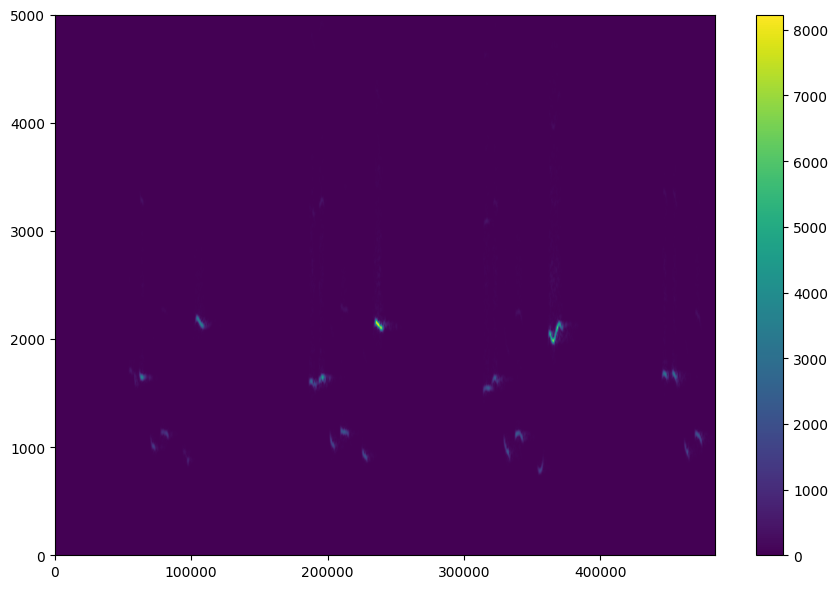

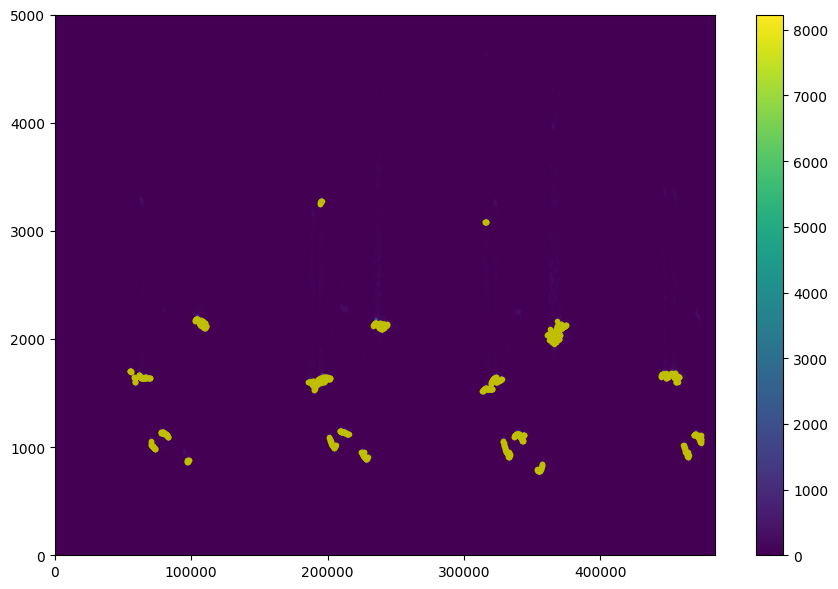

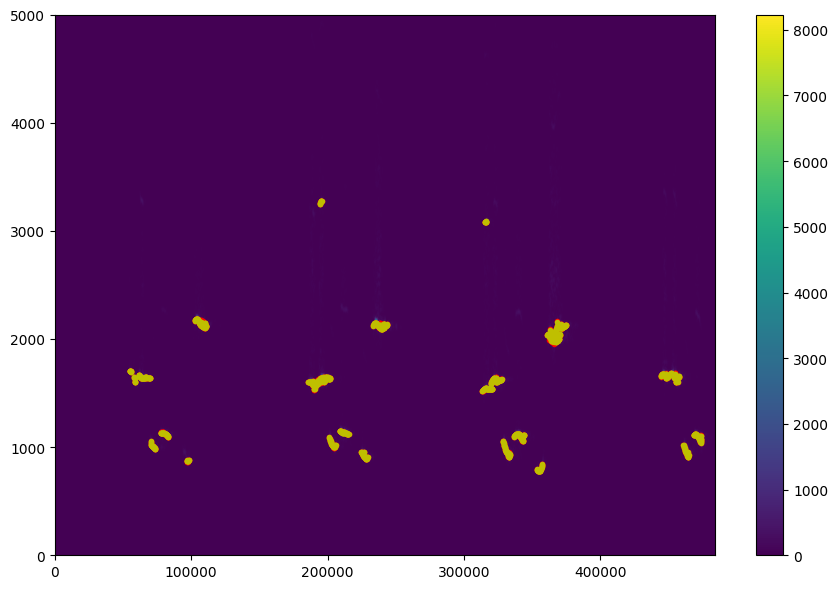

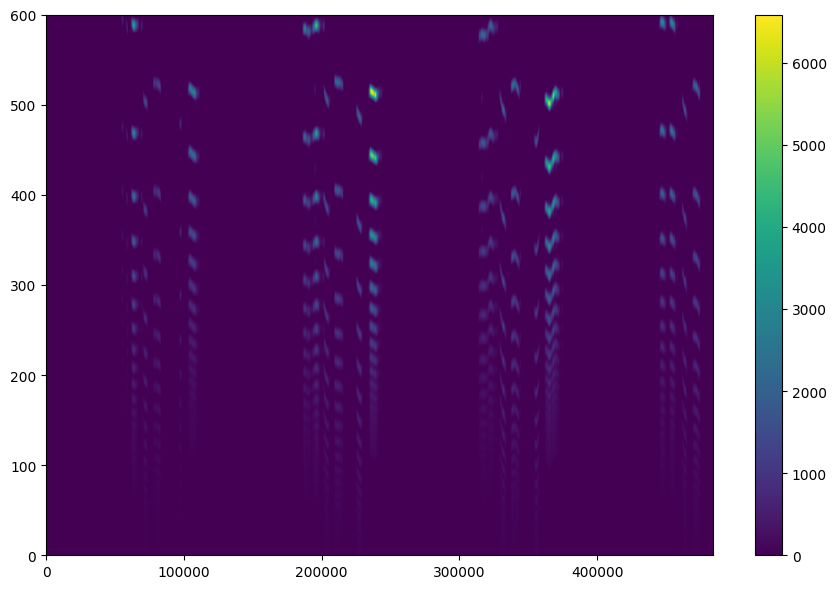

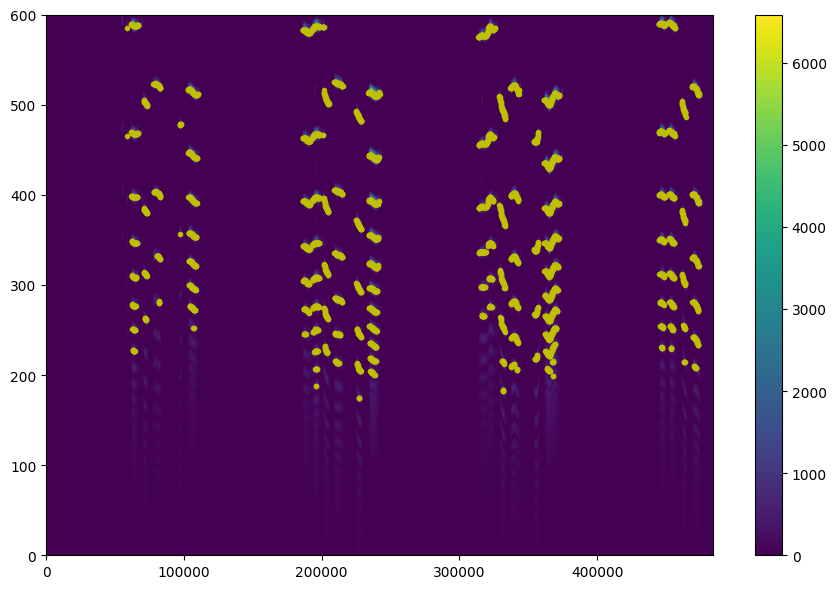

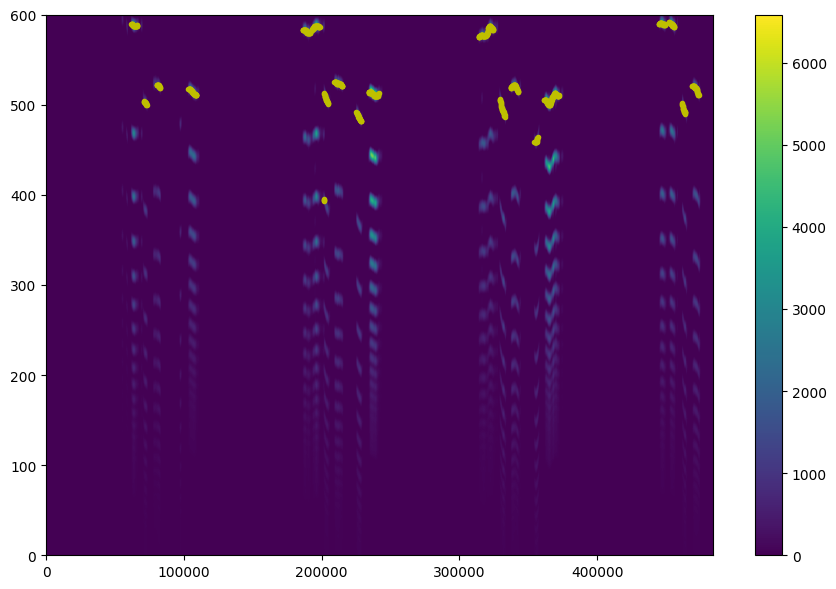

C:\Users\HakkinDavid\AppData\Local\Temp\ipykernel_7824\2243709575.py:342: UserWarning: Adding colorbar to a different Figure <Figure size 900x600 with 3 Axes> than <Figure size 900x600 with 1 Axes> which fig.colorbar is called on.
  fig1.colorbar(im1)


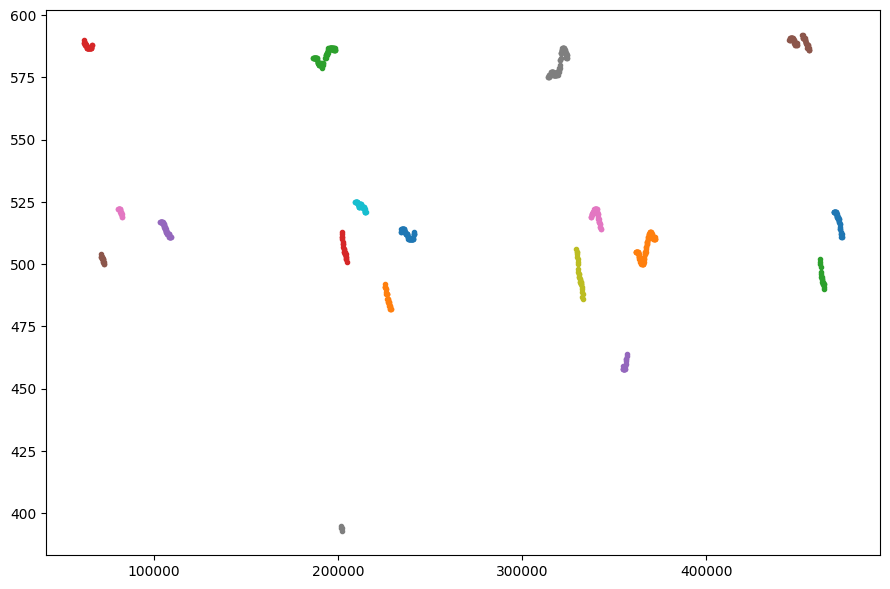

C:\Users\HakkinDavid\AppData\Local\Temp\ipykernel_7824\2243709575.py:381: UserWarning: Adding colorbar to a different Figure <Figure size 900x600 with 4 Axes> than <Figure size 900x600 with 1 Axes> which fig.colorbar is called on.
  fig1.colorbar(im1)


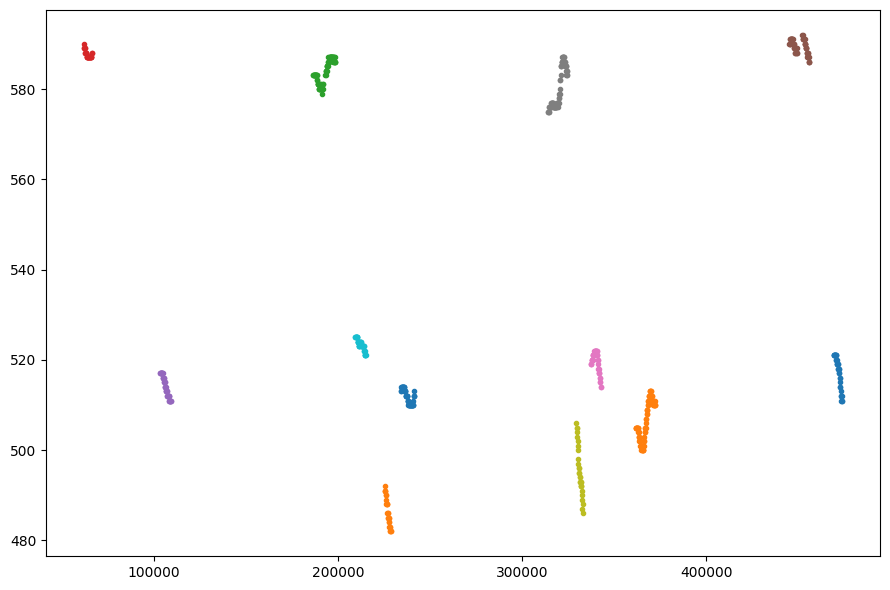

C:\Users\HakkinDavid\AppData\Local\Temp\ipykernel_7824\2243709575.py:529: UserWarning: Adding colorbar to a different Figure <Figure size 900x600 with 5 Axes> than <Figure size 900x600 with 1 Axes> which fig.colorbar is called on.
  fig1.colorbar(im1)


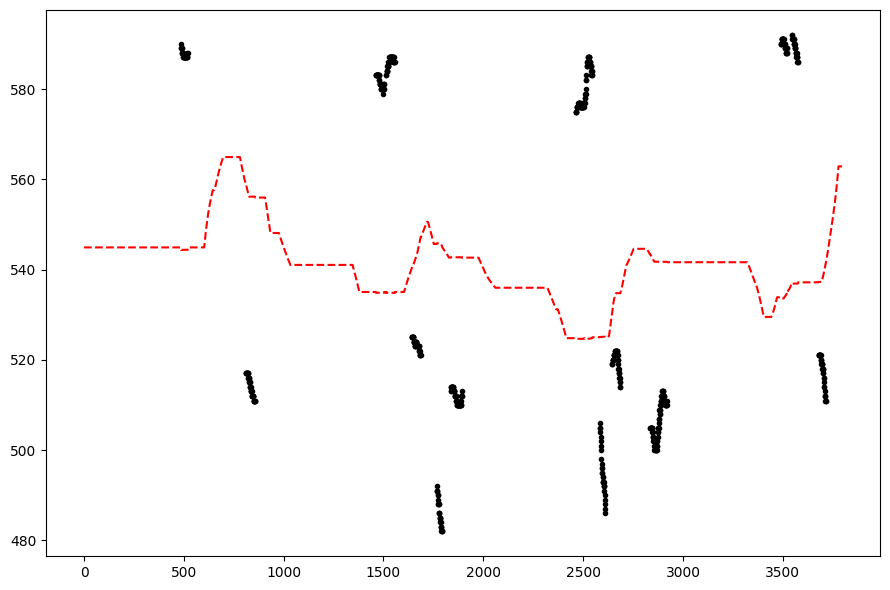

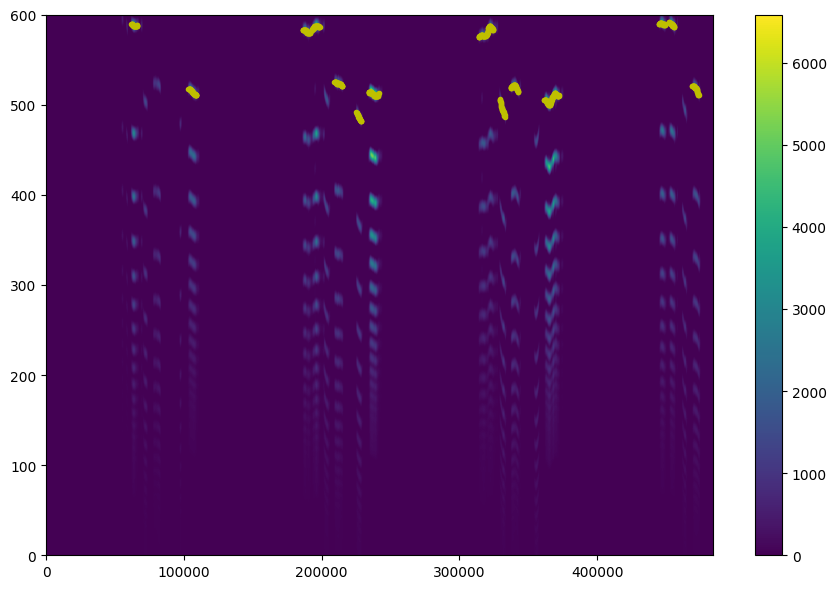

time: 31.2 s (started: 2024-11-20 18:53:03 -08:00)


In [10]:
filtered = MAAS_filter(data, sr, None if (IN_COLAB or not IN_COLAB and audio.endswith('_whistled')) else './database/' + audio + '.csv')

In [11]:
filtered

[array([ 486,  487,  488,  489,  490,  491,  492,  493,  494,  495,  496,
         497,  498,  499,  500,  501,  502,  503,  504,  505,  506,  507,
         508,  509,  510,  511,  512,  513,  514,  515,  516,  517,  518,
         519,  810,  811,  812,  813,  814,  815,  816,  817,  818,  819,
         820,  821,  822,  823,  824,  825,  826,  827,  828,  829,  830,
         831,  832,  833,  834,  835,  836,  837,  838,  839,  840,  841,
         842,  843,  844,  845,  846,  847,  848,  849,  850,  851,  852,
         853,  854,  855,  856, 1462, 1463, 1464, 1465, 1466, 1467, 1468,
        1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479,
        1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490,
        1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501,
        1502, 1503, 1504, 1513, 1515, 1516, 1517, 1518, 1519, 1520, 1521,
        1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532,
        1533, 1534, 1535, 1536, 1537, 

time: 0 ns (started: 2024-11-20 18:53:35 -08:00)


In [12]:
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

time: 15 ms (started: 2024-11-20 18:53:35 -08:00)


In [13]:
def LinearRegressionMAAS(timepairsRec,timepairsTest,details):
  timepairsRec = np.array(timepairsRec)
  timepairsTest = np.array(timepairsTest)
  n = len(timepairsRec)
  xi = timepairsRec
  yi = timepairsTest
  xi2=xi**2
  yi2=yi**2
  xiyi=xi*yi
  table=np.transpose([xi,yi,xi2,yi2,xiyi])
  #print(tabulate(table,headers=["xi","yi","xi^2","yi^2","xiyi"],tablefmt="grid")) | Tabla de valores
  xiS=np.sum(xi)
  yiS=np.sum(yi)
  xi2S=np.sum(xi2)
  yi2S=np.sum(yi2)
  xiyiS=np.sum(xiyi)
  sumApp=([xiS,yiS,xi2S,np.around(yi2S,decimals=2),xiyiS])  # Creacion de la tabla de sumatorias

  # Paso 1. Calculo de a1
  a1=(n*(xiyiS)-(xiS*yiS))/(n*xi2S-(xiS**2))
  xProm=xiS/n
  yProm=yiS/n

  # Paso 2. Calculo de a0
  a0=yProm-(a1*xProm)

  # Coeficiente de correlacion
  r=(n*xiyiS - (xiS*yiS))/((math.sqrt(n*(xi2S)-(xiS**2)))*(math.sqrt(n*(yi2S)-(yiS**2))))

  # Desviacion estandar
  sig=math.sqrt(((n*(yi2S))-(yiS**2))/(n*(n-1)))

  # Graficacion
  yG= a1*xi + a0
  plt.plot(xi,yG,'bo-')
  plt.plot(xi,yi,'ko')
  plt.grid()
  plt.title("Window")
  plt.xticks(xi)
  plt.show()
  print("r =",np.around(r,decimals=6),"\nr^2 =",np.around(r**2,decimals=6))
  if(details):
    print("a1 =",np.around(a1,decimals=6))
    print("a0 =",np.around(a0,decimals=6))
    print("y =",np.around(a1,decimals=4),"x +",np.around(a0,decimals=4))
    print("Desviación estándar:",np.around(sig,decimals=4))
    print()
  return (r)


time: 0 ns (started: 2024-11-20 18:53:35 -08:00)


In [14]:
def SlidingWindowRegression(recording_song,test_song,step_size, silent = True):

  n = len(recording_song)
  m = test_song.shape[1]
  r_arr = []
  count = 0
  for i in range(0, m-n+1, step_size):
   current = test_song[:,i:i+n]
   timepairsRec = []
   timepairsTest = []
   for j in range(current.shape[1]):

      if(abs(current[1,j] - recording_song[1][j]) < 5):

        timepairsRec.append(recording_song[0][j])
        timepairsTest.append(current[0,j])

   count += 1

   if len(timepairsRec) > 1 and len(timepairsTest) > 1:
     r = (LinearRegressionMAAS(timepairsRec,timepairsTest,False))**2
     r_arr = np.append(r_arr,r)
     if (not silent): print(f'Window {count} done successfully.')

   else:
     if (not silent): print(f'Window {count} done, no pairs found.')

  if (np.any(r_arr)):
    return(np.max(r_arr))

  else:
    if (not silent): print("Zero matches.\n")

    return(0)

time: 16 ms (started: 2024-11-20 18:53:35 -08:00)


In [15]:
def get_database():
    filenames = listdir("/content/" if IN_COLAB else "./database/")
    return [ filename for filename in filenames if filename.endswith( ".csv" ) ]

time: 0 ns (started: 2024-11-20 18:53:35 -08:00)


In [16]:
def compare(filtered_song, db_obj, silent = True):
    test_song = np.transpose(np.genfromtxt(("/content/" if IN_COLAB else "./database/") + db_obj, delimiter=",", skip_header=1))
    
    #test_song is an np array
    #filtered is a python list
    
    n = len(filtered_song[1])
    
    # SlidingWindowRegression already squares 'r'
    r2 = SlidingWindowRegression(filtered_song,test_song,75)
    
    if (r2):
      if (not silent): print("Best R^2:", r2)
    else:
      if (not silent): print(f"Zero correlation found for {db_obj}.")
    return r2

time: 16 ms (started: 2024-11-20 18:53:35 -08:00)


In [17]:
database = get_database()
results = {}
for SONG in database:
    results[SONG] = compare(filtered, SONG)

print(f"La canción identificada fue {max(results, key=results.get)}")

La canción identificada fue caradenada.csv
time: 125 ms (started: 2024-11-20 18:53:35 -08:00)
